## Outline 
<ul> <a href="#T1"><b>Univariate </b></a>
    <ul>
    <li><a href="#p1">Bar chart </a></li>
    <li><a href="#p2">Pie chart</a></li>
    <li><a href="#p3">Histogram</a></li>
    <li><a href="#p4">Axes and plots</a></li>
    <li><a href="#p5">Scales and Transformation</a></li>
    </ul>
     <a href="#T2"><b>Bivariate </b></a>
    <ul>
     <li><a href="#tp1"> Scatter Plot (correlation)</a></li>
    <li><a href="#tp2">Tech: Overlapping issue</a></li>
    <li><a href="#tp3">Heat Maps</a></li>
    <li><a href="#tp4">Violin and Box plots</a></li>
        <li><a href="#tp5">Clustered Bar charts (Stacked Bar)</a></li>
            <li><a href="#tp6">Tech: Faceting</a></li>
       <li><a href="#tp7">Line chart</a></li>
     </ul>
   <a href="#T3"><b>Multivariate </b></a>
    <ul>
     <li><a href="#pp1">Method1: Encoding (Size, shape, color)</a></li>
    <li><a href="#pp2">Method2: Faceting into two directions</a></li>
    <li><a href="#pp3">Additional Method2</a></li>
    <li><a href="#pp4">Plot Matrices</a></li>
    <li><a href="#pp5">Feature Engineering</a></li>
     </ul>
   <a href="#T4"><b>Polish Plots </b></a>
</ul>

In [85]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [92]:
# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2, scales_solution_1,scales_solution_2
from solutions_biv import scatterplot_solution_1

In [4]:
pokemon = pd.read_csv('./data/pokemon.csv')
fuel = pd.read_csv('./data/fuel_econ.csv')

****
<a id='T1'></a>
# Univariate 


<a id='p1'></a>

## Bar chart 

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

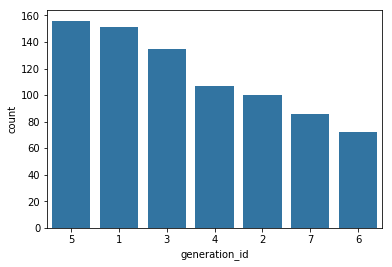

In [5]:
# YOUR CODE HERE
sns.countplot(data = pokemon, x = 'generation_id',\
              color = sns.color_palette()[0],
              order = pokemon.generation_id.value_counts().index);  

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [6]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


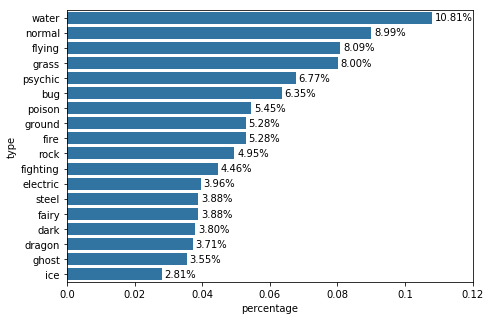

In [7]:
plt.figure(figsize = (16,5))
# ---------Absolute frequencies 
plt.subplot(1,2,2)
sns.countplot(# basic data 
                   data = pkmn_types, y = 'type',
              # color choosing 
                   color = sns.color_palette()[0], 
              # order by count 
                   order = pkmn_types.type.value_counts().index)

# change the x tick unit of measure to percentage 
# + 0.02 for additional unit space in case hit the limit 
plt.xticks(
    # location
    np.arange(0, pkmn_types.type.value_counts().max()/pkmn_types.type.value_counts().sum()+0.02, 0.02)\
            *pkmn_types.type.value_counts().sum() , 
    # name
    np.arange(0,pkmn_types.type.value_counts().max()/pkmn_types.type.value_counts().sum() +0.02, 0.02))

# Add annotations for each bar 
for i in range(pkmn_types.type.value_counts().shape[0]):
    count = pkmn_types.type.value_counts()[i]
    plt.text(# 1. x position
             count +1, 
             # 2. y position
             i, 
             # 3. string to be printed
             '{:.2f}%'.format(pkmn_types.type.value_counts()[i]*100/pkmn_types.type.value_counts().sum()  ), 
             # 4. extra: va to show text location
             va= 'center')

plt.xlabel('percentage');

****

<a id='p2'></a>

## Pie chart 

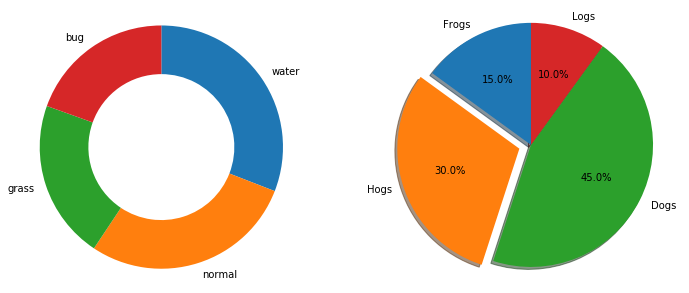

In [8]:
plt.figure(figsize =(12,5))
# --------------------- Donut Plot-------------------
plt.subplot(1,2,1)
sorted_counts = pokemon.type_1.value_counts()[:4]
plt.pie(sorted_counts, 
        labels = sorted_counts.index, 
        startangle = 90,
        counterclock = False, 
        wedgeprops = {'width' : 0.4})
  
plt.axis('square')

# --------------------- Pie plot with explode -------------------
plt.subplot(1,2,2)
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show();

****

<a id='p3'></a>

## Histogram
Task: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a histogram that depicts the distribution of 'special-defense' values taken. Hint: Try playing around with different bin width sizes to see what best depicts the data.

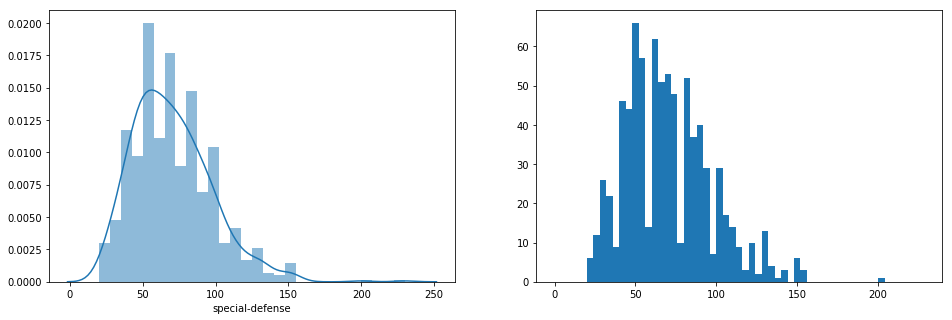

In [9]:
plt.figure(figsize =(16,5))
plt.subplot(1,2,1)
sns.distplot(pokemon['special-defense'], kde = True,
            hist_kws = {'alpha' : 0.5})

#--------Or use histogram 
bin_edges = np.arange(0, pokemon['special-defense'].max(), 4 )
plt.subplot(1,2,2)
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges);

****

<a id='p4'></a>

## Axes, figure and subplots

Python plot hierarchy:   
 1.  create Figure object   
 2.  add axes object inside figure object  
 3.  draw plot within axes

so we can try to simulate the process:

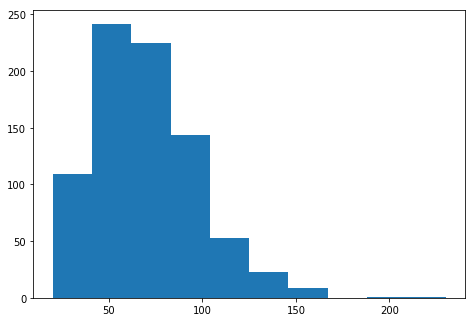

In [10]:
fig = plt.figure()
# first two elements of the list indicate the position of lower-left hand corner, 
# the last two specifying the axes width and height
ax = fig.add_axes([0.25, 0.25, 1, 1])
ax.hist(data = pokemon, x ='special-defense');

**Subplot**

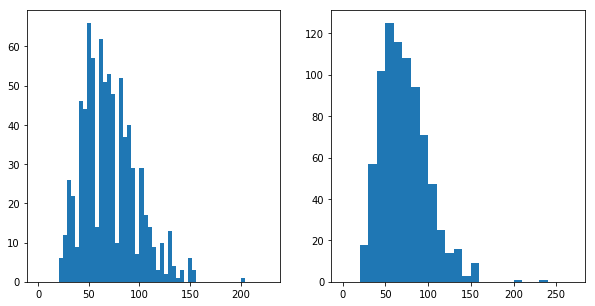

In [11]:
plt.figure(figsize = [10, 5])

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['special-defense'].max(), 4 )
plt.hist(data = pokemon, x ='special-defense', bins = bin_edges)

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['special-defense'].max()+50, 10)
plt.hist(data = pokemon, x ='special-defense', bins = bin_edges);

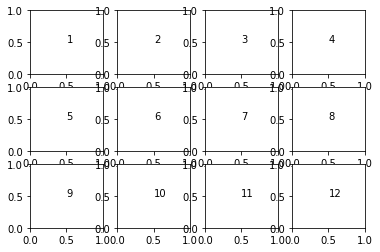

In [12]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

****

<a id='p5'></a>

## Scales and Transformation

**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

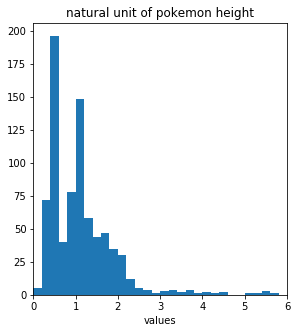

In [13]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon.height.max()+0.2, 0.2)
plt.hist(pokemon.height, bins = bin_edges)
plt.xlabel('values')
plt.title('natural unit of pokemon height')
plt.xlim((0,6));


**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

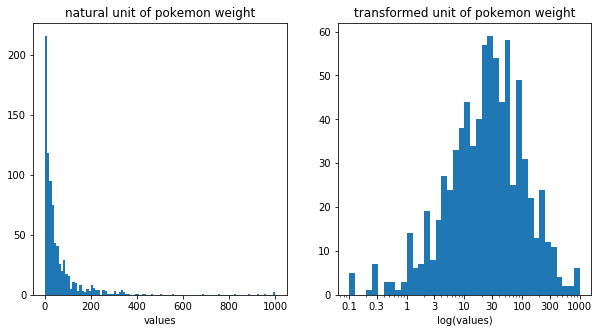

In [14]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon.weight.max()+10, 10)
plt.hist(pokemon.weight, bins = bin_edges)
plt.xlabel('values')
plt.title('natural unit of pokemon weight');


# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)

bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(pokemon.weight, bins = bins) # direct data transform
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('log(values)')
plt.title('transformed unit of pokemon weight');

****

<a id='T2'></a>

# Bivariate
<a id='tp1'></a>

## Scatter plot
**Correlation**

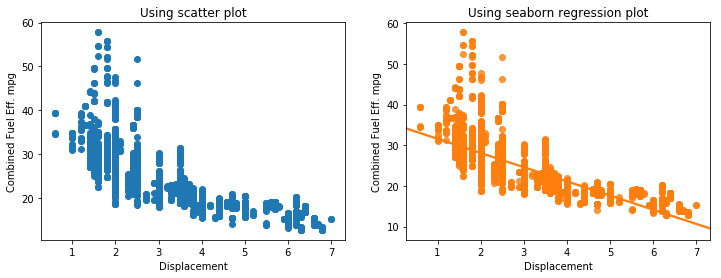

In [15]:
plt.figure(figsize = [12, 4])

# left: correlation 
plt.subplot(1, 2, 1)

plt.scatter(data = fuel, x= 'displ', y= 'comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('Using scatter plot')

# right: seaborn regression correlation 
plt.subplot(1, 2, 2)

sns.regplot(data = fuel, x= 'displ', y= 'comb', color = sns.color_palette()[1])
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('Using seaborn regression plot');

<a id='tp2'></a>

## Overplotting issue
Method :  
1. Sampling   
2. Transparency  
3. Jitter

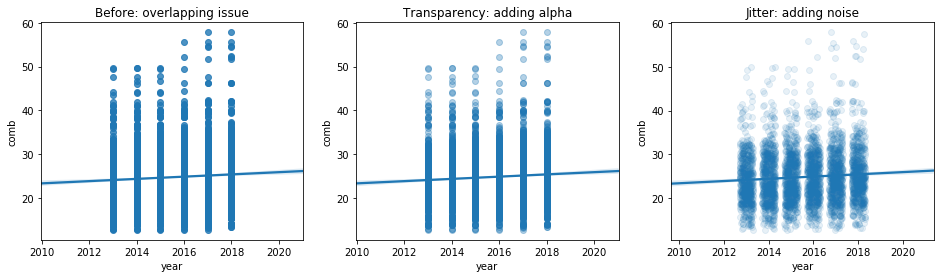

In [20]:
plt.figure(figsize = [16, 4])

# Before: Overlapped origion 
plt.subplot(1, 3, 1)
sns.regplot(data = fuel, x = 'year', y = 'comb')
plt.title('Before: overlapping issue')


# After: Fixed Overlapped origion via Transparency 
plt.subplot(1, 3, 2)
sns.regplot(data = fuel, x = 'year', y = 'comb', scatter_kws = {'alpha' : 1/3})
plt.title('Transparency: adding alpha')


# After: Fixed Overlapped origion via Jitter 
plt.subplot(1, 3, 3)
sns.regplot(data = fuel, x = 'year', y = 'comb', \
           x_jitter =0.3, y_jitter = 0.3, \
         scatter_kws = {'alpha' : 1/10})
plt.title('Jitter: adding noise');

<a id='tp3'></a>

## Heat Maps
- 2d historgram 
- Bin size are import! 

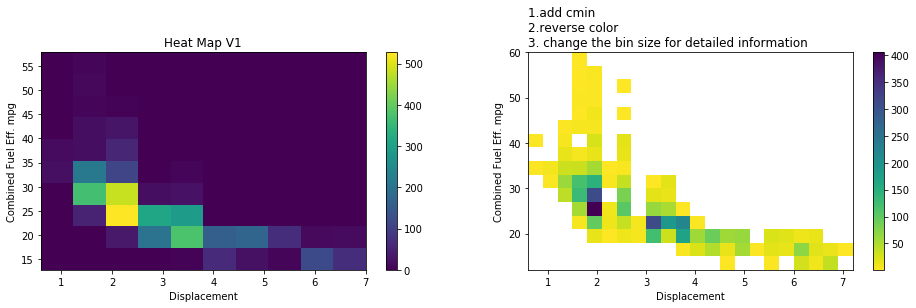

In [21]:
plt.figure(figsize =[16,4])

plt.subplot(1, 2, 1)
plt.hist2d(data = fuel, x= 'displ', y= 'comb')
# Add the legend associating the counts to colors is placed adjacent to the right of the plot 
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('Heat Map V1')

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel, x= 'displ', y= 'comb', 
       # Add cmin so any bin with no counts will return as not a number will not get colored    
          cmin = 0.5,
       # Add cmap color with `_r` which means reversed color map
          cmap = 'viridis_r',
       # Add bins 
          bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('1.add cmin\n2.reverse color\n3. change the bin size for detailed information', loc ='left');

<a id='tp4'></a>

## [Violin](https://www.youtube.com/watch?time_continue=86&v=f8Kh4PByiEA&feature=emb_logo) plots and Box plots 



In [22]:
ordinal_class= ['Minicompact Cars', 'Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']

In [23]:
vclasses = pd.api.types.CategoricalDtype(ordered= True, categories = ordinal_class)

In [24]:
fuel['VClass'] = fule['VClass'].astype(vclasses)

NameError: name 'fule' is not defined

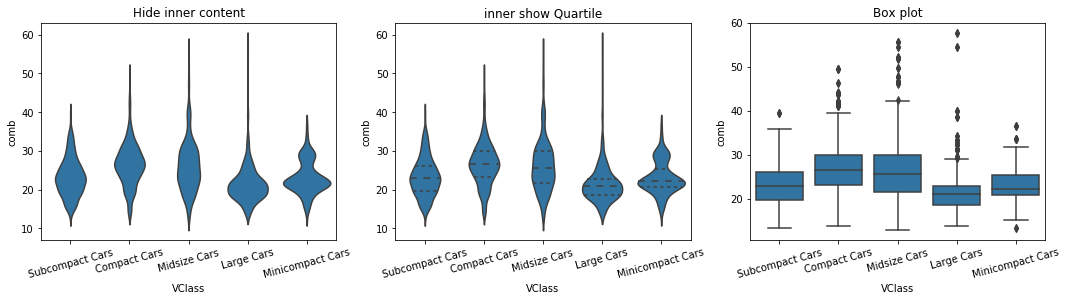

In [25]:
plt.figure(figsize = (18,4))

plt.subplot(1, 3, 1)
base_color = sns.color_palette()[0]
sns.violinplot(data= fuel, x ='VClass', y='comb', color= base_color,\
               # to hide the box plot inside of the violin plots 
               inner = None)
plt.xticks(rotation =15)
plt.title("Hide inner content")


plt.subplot(1, 3, 2)
base_color = sns.color_palette()[0]
sns.violinplot(data= fuel, x ='VClass', y='comb', color= base_color,\
               # to show as `Quartile` (median and quartile)
               inner = 'quartile')
plt.xticks(rotation =15)
plt.title("inner show Quartile")

plt.subplot(1, 3, 3)
base_color = sns.color_palette()[0]
sns.boxplot(data= fuel, x ='VClass', y='comb', color= base_color)
plt.xticks(rotation =15)
plt.title("Box plot");

**Interpretation:**  
For each of the vehicle classes, an area is plotted that shows the approximate density of efficiency values for each vehicle class. They're like density curves turned on their sides.  
From this plot, we can see that there isnt a monotonic relationship between car size and fuel efficiency. 
The largest cars seem to have lowest fuel efficiencies,but the long tail sugguest outliers with highest of efficiencies.  
Minicompact and Subcompact cars have the next best efficiencies but the distribution for Minicompact cars is much more peaked. 
Finally, compact and midsize cars have the best efficiencies but the distribution of the Midsize cars is broder than the compact. 

**Box plot Details:**   
Bottom of each box indicates the first quartile and the top of each box, the third quartile.  
Central line: median of each group  
Whiskers branche out toward the min and max and each group with outliers depicted as individual points past a maximum whisker length.  

### Adapted plots

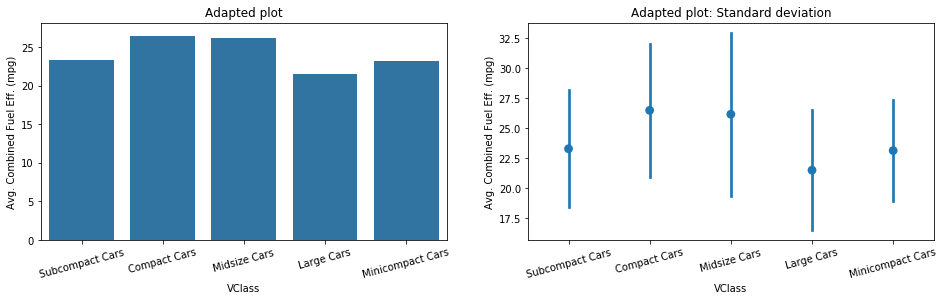

In [26]:
plt.figure(figsize = (16,4)) 

plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.barplot(data= fuel, x ='VClass', y='comb', color= base_color,
           # leave whiskers out of the plot 
           errwidth =0)
plt.xticks(rotation =15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")
plt.title("Adapted plot")

plt.subplot(1,2,2)
base_color = sns.color_palette()[0]
sns.pointplot(data= fuel, x ='VClass', y='comb',
           # set the calculation by standard deviation 
           ci = 'sd',
           # set the linestype by empty string   dashed"--"  noline " "  connected line "-"
           linestyles = "")
plt.xticks(rotation =15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")
plt.title("Adapted plot: Standard deviation");

<a id='tp5'></a>

## Clustered Bar charts
Qual. vs Quant.

In [27]:
fuel['trans_type'] = fuel['trans'].apply(lambda x: x.split()[0])

In [28]:
ct_counts = fuel.groupby(['VClass','trans_type']).size()\
                .reset_index(name ='count')
ct_counts = ct_counts.pivot(index='VClass', columns ='trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


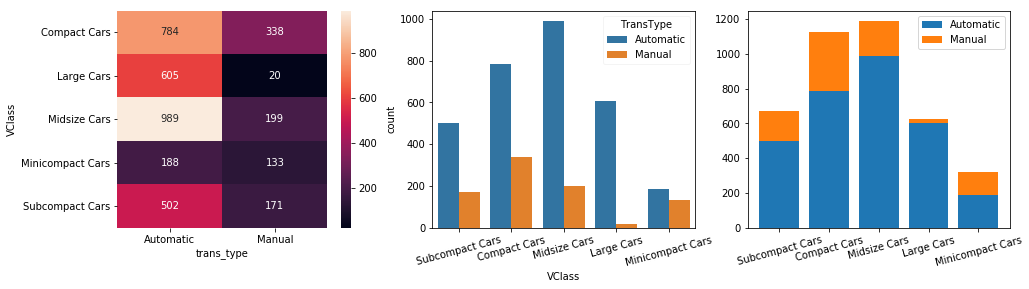

In [29]:
plt.figure(figsize = (16,4))
#-----------using the heatmap 
plt.subplot(1,3,1)
sns.heatmap(ct_counts, \
            # add annotation 
            annot = True, 
            # all the counts are listed as decimal values can use fmt ='.0f' if we have any cells with no counts
            fmt = 'd')

#-----------using the clustered bar chart 
plt.subplot(1,3, 2)
ax = sns.countplot(data = fuel, x='VClass', 
             # pointing to trnastype variable 
             hue ='trans_type')
plt.xticks(rotation =15)

# loc 1,2,3,4 four corners 1 upper right, 2 upper left, 3 lower left , 4 lower right
ax.legend(loc =1 , framealpha = 0.2, title ='TransType')

#-----------Stacked bar plot  
plt.subplot(1,3, 3)
cat1_order = fuel.VClass.unique().tolist()
cat2_order = fuel.trans_type.unique().tolist()
cat_var2 = 'trans_type'
cat_var1 = 'VClass'
baselines = np.zeros(len(cat1_order))

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = fuel[fuel[cat_var2] == cat2][cat_var1].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order, rotation =15)
plt.legend(cat2_order);

<a id='tp6'></a>

## Faceting
The axis scales and limits are consistent across each subplot.  
`data` , x, `col_wrap` (limit the number of facets that can be placed side by side)

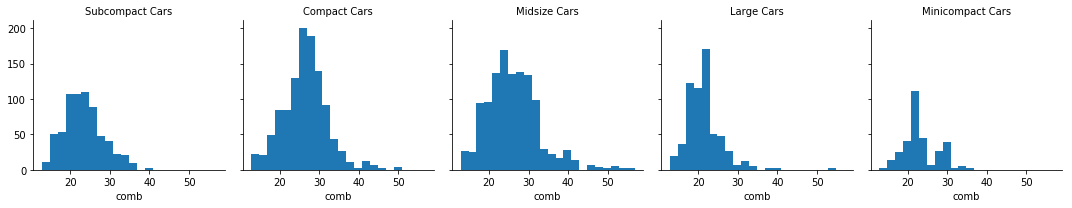

In [30]:
# Step1 : make a Seaborn Facet Grid object Class 
# It means that for whatever plot we facet with, there will be one of that plot made for each level of vehicle class
g = sns.FacetGrid(data = fuel,  col ='VClass' # col_wrap =3 to limit the number of facets show each row)
                 )
# Step2" we need to say what kind of plot we want to generate for each of the facet using map function of facet grid;
g.map( #( plot, x argument, , bins) 
     plt.hist, 'comb', 
      # to make sure every facet in the same axis 
     bins = np.arange(fuel.comb.min(), fuel.comb.max(),2))
g.set_titles('{col_name}'); 

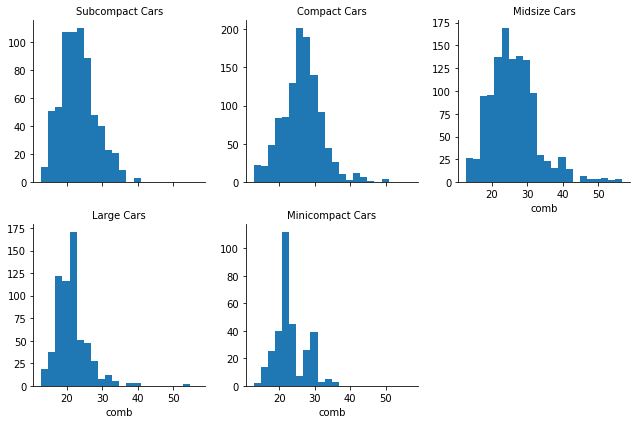

In [31]:
g = sns.FacetGrid(data = fuel,  col ='VClass', col_wrap =3, sharey = False)
g.map( plt.hist, 'comb',\
       bins = np.arange(fuel.comb.min(), fuel.comb.max(),2))
g.set_titles('{col_name}'); 

<a id='tp6'></a>
## Line Plots

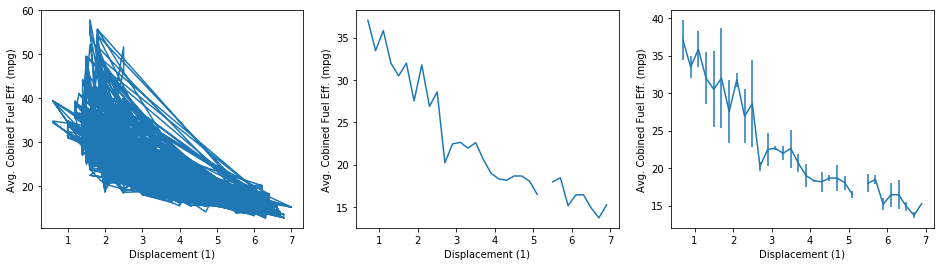

In [32]:
plt.figure(figsize= (16,4))
plt.subplot(1,3,1)

plt.errorbar(data = fuel, x='displ', y='comb')
plt.xlabel("Displacement (1)") 
plt.ylabel('Avg. Cobined Fuel Eff. (mpg)')


#-------------Fix the issue 
plt.subplot(1,3,2)
binsize = 0.2
bins_edges = np.arange(0.6, fuel['displ'].max() +binsize, binsize)
bins_center = (bins_edges+ binsize/2)[:-1]

displ_binned = pd.cut(fuel['displ'], bins_edges, include_lowest = True)
comb_mean = fuel['comb'].groupby(displ_binned).mean() 

plt.errorbar( x=bins_center, y= comb_mean)
plt.xlabel("Displacement (1)") 
plt.ylabel('Avg. Cobined Fuel Eff. (mpg)')


#-------------Fix the issue Add Standard error 
comb_std = fuel['comb'].groupby(displ_binned).std() 
plt.subplot(1,3,3)
plt.errorbar( x=bins_center, y= comb_mean, yerr = comb_std)
plt.xlabel("Displacement (1)") 
plt.ylabel('Avg. Cobined Fuel Eff. (mpg)');

****

<a id='T3'></a>

# Multivariate

<a id='pp1'></a>

## Method 1:  Encoding For third variable 
- Non-Positional   
    - By Size   
    - By Shape  
- Positional 
    - By Color

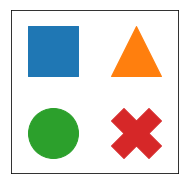

In [33]:
plt.figure(figsize = [3,3])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([]);

#### Encoding by Shape 

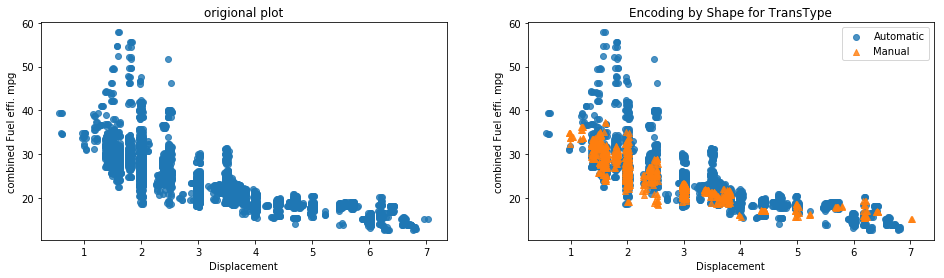

In [34]:
plt.figure(figsize= (16,4))

plt.subplot(1,2,1)
sns.regplot(data =fuel, x='displ', y='comb', x_jitter =0.04, fit_reg= False)
plt.xlabel("Displacement")
plt.ylabel("combined Fuel effi. mpg")
plt.title("origional plot")

# After------------ adding the shape to show different marker 
# Step1: create a list to let the marker paramet to accept the single string
ttype_markers=[['Automatic', 'o'], # to show as circles 
                 ['Manual','^']]   # to show as triangles 
plt.subplot(1,2,2)
for ttype, marker in ttype_markers: 
    plot_data = fuel.loc[fuel.trans_type== ttype] 
    sns.regplot(data =plot_data, x='displ', y='comb', x_jitter =0.04, fit_reg= False,\
                marker = marker)
plt.xlabel("Displacement")
plt.ylabel("combined Fuel effi. mpg")
plt.legend(['Automatic','Manual'])
plt.title("Encoding by Shape for TransType");

#### Encoding by Size 

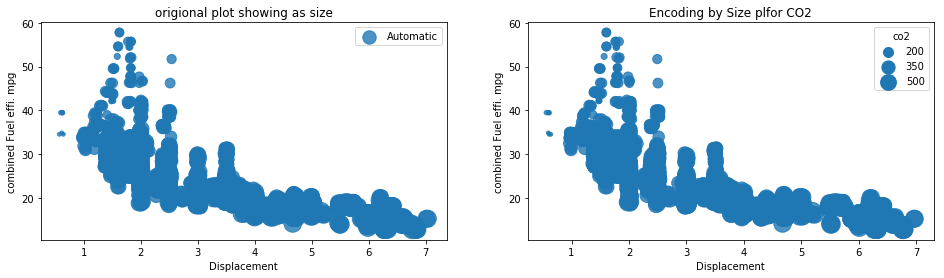

In [35]:
plt.figure(figsize= (16,4))
# After------------ adding the size to show CO2 emission
plt.subplot(1,2,1)
sns.regplot(data =fuel, x='displ', y='comb', x_jitter =0.04, fit_reg= False,\
            scatter_kws = {'s': fuel['co2']/2}) # s for size 
plt.xlabel("Displacement")
plt.ylabel("combined Fuel effi. mpg")
plt.legend(['Automatic','Manual'])
plt.title("origional plot showing as size")

# After------------ adding the detailed size to show CO2 emission
plt.subplot(1,2,2)
sizes = [200, 350, 500]
base_color= sns.color_palette()[0]
legend_obj = [] 
sns.regplot(data =fuel, x='displ', y='comb', x_jitter =0.04, fit_reg= False,\
            scatter_kws = {'s': fuel['co2']/2}) # s for size 
for s in sizes:
    legend_obj.append(plt.scatter([],[], s= s/2, color= base_color))  
plt.xlabel("Displacement")
plt.ylabel("combined Fuel effi. mpg")
plt.legend(legend_obj, sizes, title ='co2')
plt.title("Encoding by Size plfor CO2");

#### Encoding by Color 
- Can be used for both qualitatvie and quantitave values. 
- Color Palette:  
    - Qualitative Palette  (for categorical)
    - Sequential Palette  (for numeric)
    - Diverging Palette (like two sequential palette with distinct hues put back to back) 

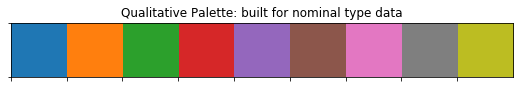

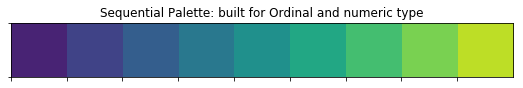

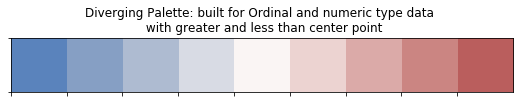

In [36]:

# Qualitative 
sns.palplot(sns.color_palette(n_colors=9))
plt.title('Qualitative Palette: built for nominal type data');

# sequential 
sns.palplot(sns.color_palette('viridis', 9))
plt.title('Sequential Palette: built for Ordinal and numeric type');

# Diverging  
sns.palplot(sns.color_palette('vlag', 9))
plt.title('Diverging Palette: built for Ordinal and numeric type data \n with greater and less than center point');

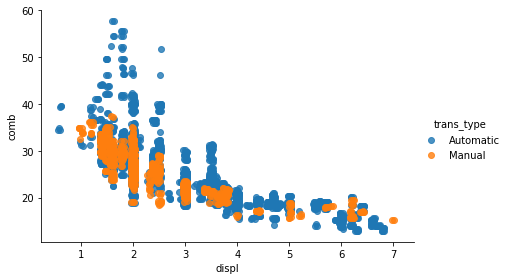

In [37]:
g = sns.FacetGrid(data = fuel, hue ='trans_type', \
                  hue_order = ['Automatic','Manual'], height =4, aspect =1.5)
# Step2" we need to say what kind of plot we want to generate for each of the facet using map function of facet grid;
g.map( #( plot, x argument, , bins) 
     sns.regplot, 'displ','comb', x_jitter =0.04, fit_reg = False)
g.add_legend()
g.set_titles('{col_name}');

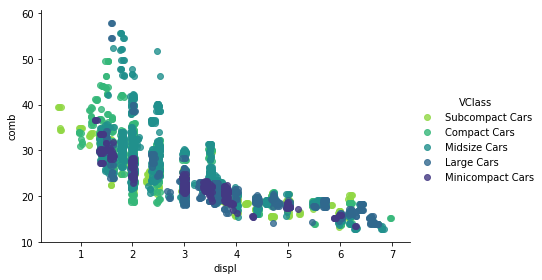

In [38]:
g = sns.FacetGrid(data = fuel, hue ='VClass', \
                  palette ='viridis_r' , height =4, aspect =1.5)
# Step2" we need to say what kind of plot we want to generate for each of the facet using map function of facet grid;
g.map( #( plot, x argument, , bins) 
     sns.regplot, 'displ','comb', x_jitter =0.04, fit_reg = False)
g.add_legend()
g.set_titles('{col_name}');

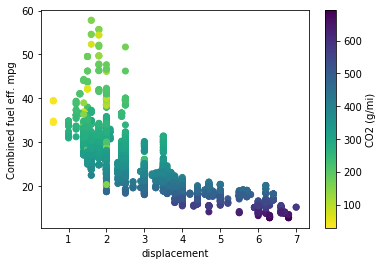

In [39]:
plt.scatter(data = fuel, x='displ', y='comb', c='co2',\
            cmap ='viridis_r' )
plt.colorbar(label ='CO2 (g/mi)')
plt.ylabel('Combined fuel eff. mpg');
plt.xlabel('displacement');

<a id='pp2'></a>

## Method 2:  Faceting in two directions 
- Faceting by the categorical variable

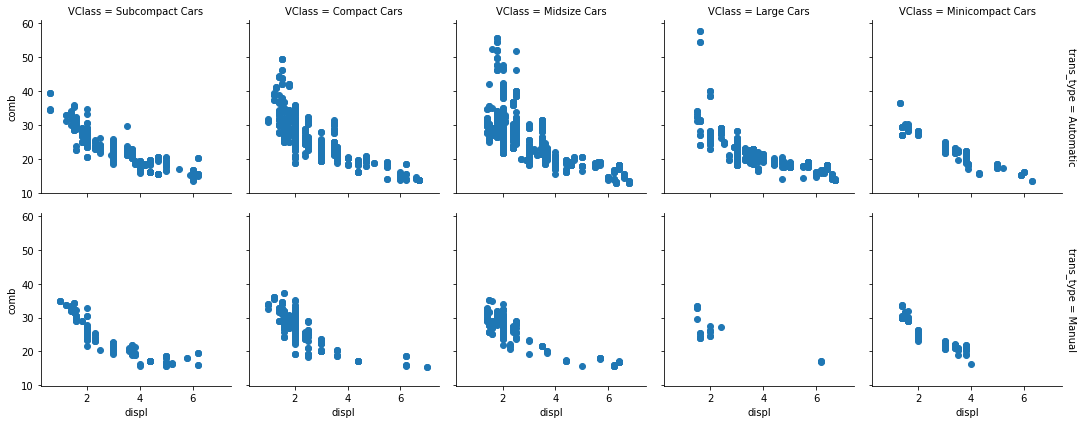

In [40]:
g = sns.FacetGrid(data = fuel,  col ='VClass', row='trans_type',\
                 margin_titles = True)
g.map( plt.scatter, 'displ','comb'); 

Setting `margin_titles = True` means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

<a id='pp3'></a>

## Addition Method 2

- Heatmap   
- Bar plot

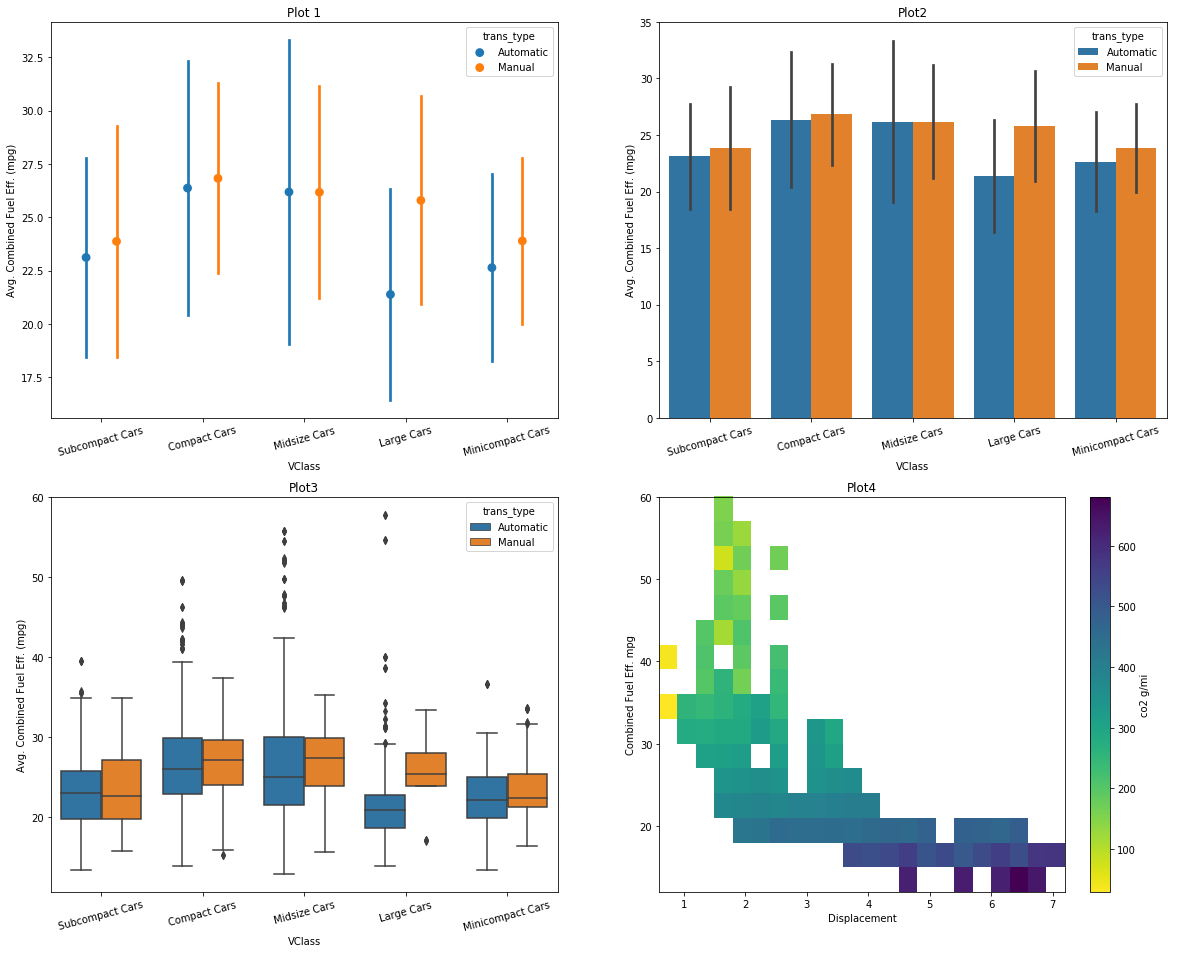

In [41]:
plt.figure(figsize =(20,16))

plt.subplot(2,2,1)
base_color = sns.color_palette()[0]
sns.pointplot(data= fuel, x ='VClass', y='comb', ci = 'sd', linestyles = "",\
              hue ='trans_type', # add hue to introduce another direction
              dodge = 0.3)  #to offset the two levels slightly
plt.xticks(rotation =15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")
plt.title("Plot 1")

plt.subplot(2,2,2)
base_color = sns.color_palette()[0]
sns.barplot(data= fuel, x ='VClass', y='comb', ci = 'sd', hue ='trans_type' )  
plt.xticks(rotation =15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")
plt.title("Plot2")

plt.subplot(2,2,3)
base_color = sns.color_palette()[0]
sns.boxplot(data= fuel, x ='VClass', y='comb', hue ='trans_type' )  
plt.xticks(rotation =15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")
plt.title("Plot3")

plt.subplot(2,2,4)
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

displ_bins = pd.cut(fuel['displ'], bins_x, right= False, include_lowest = False,
                    labels= False).astype(int)
comb_bins = pd.cut(fuel['comb'], bins_y, right= False, include_lowest = False,
                    labels= False).astype(int)
n_points = fuel.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns= 'comb').values
co2weights = fuel['co2']/ n_points[displ_bins, comb_bins]


plt.hist2d(data = fuel, x= 'displ', y= 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y],\
           weights = co2weights
          )
plt.colorbar(label ='co2 g/mi')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Eff. mpg')
plt.title('Plot4');

<a id='pp4'></a>

## Plot Matrices

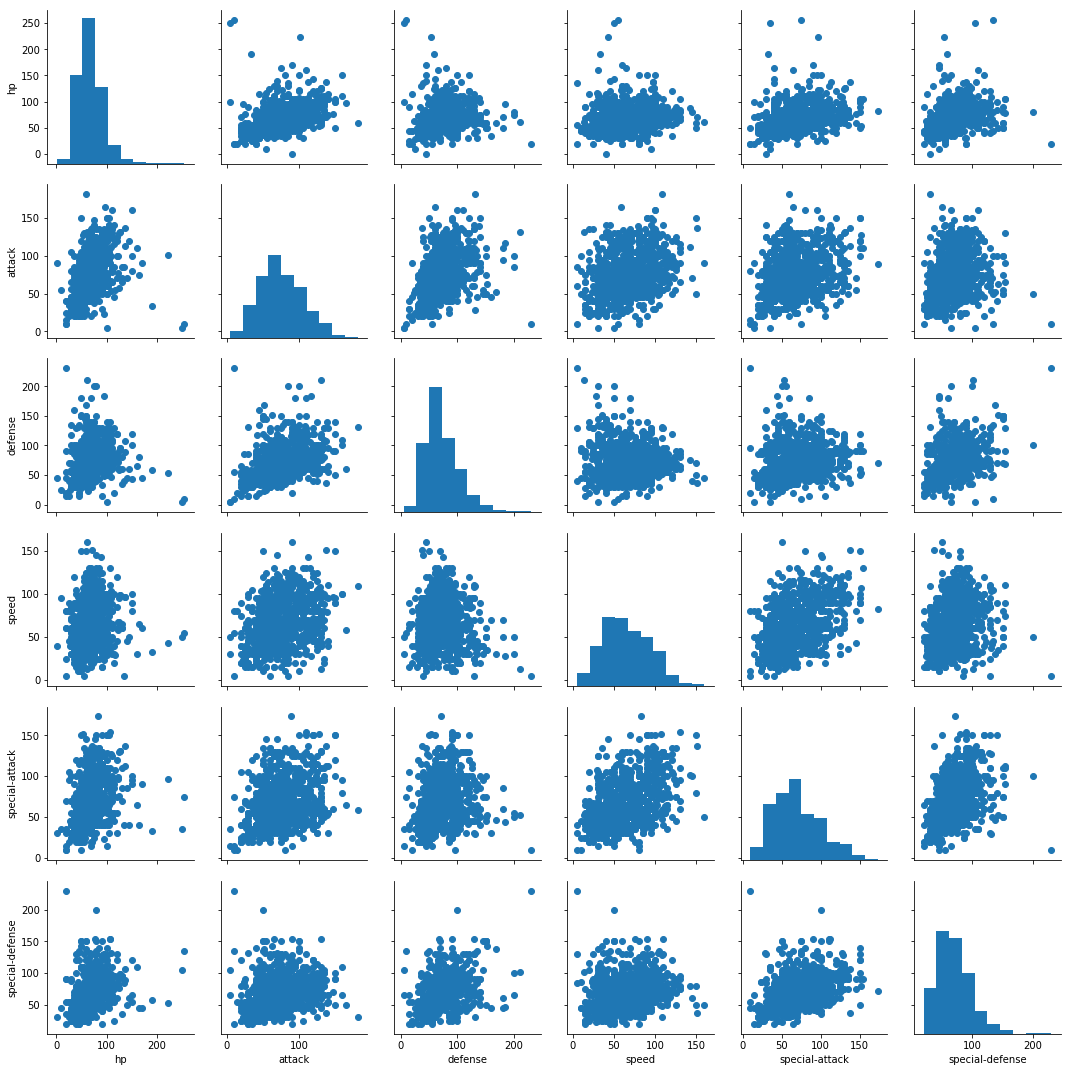

In [42]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sns.PairGrid(data = pokemon, vars = pkmn_stats)
#  g.map(plt.scatter)  this maps every plots 
g.map_offdiag(plt.scatter)  # not map to plots on diaganol 
# change the diagonal to distribution 
g.map_diag(plt.hist);

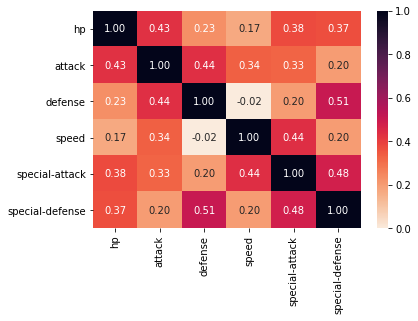

In [43]:
sns.heatmap(pokemon[pkmn_stats].corr(), \
            cmap = 'rocket_r', annot = True,\
            fmt ='0.2f', vmin =0);

<a id='pp5'></a>

## Feature Engineering

In [44]:
pokemon['atk_ratio'] = pokemon['attack']/ pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense']/ pokemon['special-defense']

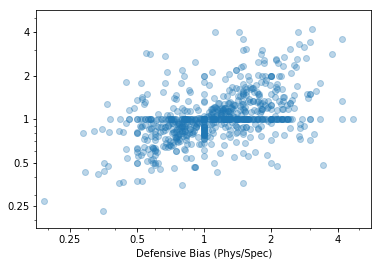

In [45]:
plt.scatter(data = pokemon, x='atk_ratio',y='def_ratio',alpha =0.3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.xlabel('Defensive Bias (Phys/Spec)')

plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25,.5,1,2,4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
plt.xlim(2 **-2.5, 2**2.5)
plt.ylim(2 **-2.5, 2**2.5);

It seems most points seem to fall along a diagonal line. In ther upper right quadrant,  we have pokemon species that are physical biased in both offense and defense, and in the lowe left-hand quadrant, they are special biased in both offense and defense.    
Interestingly, there appears to be a large number of Pokemon on the y equals 1 line showing no defensive biase. These pokemon have a wide range of offensive biases. There appeared to be much few pokemon on the x=1 line showing no offensive bias.  

<a id='T4'></a>

# Polish Plots

In [48]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

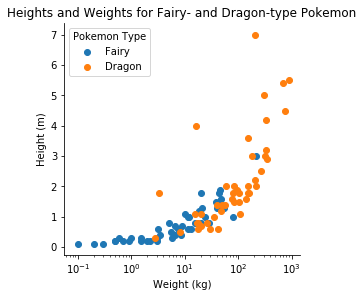

In [78]:
# Before
g = sns.FacetGrid(data = pokemon_sub, hue = 'type', height = 4)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')

# add labels and titles
g.set_xlabels('Weight (kg)')
g.set_ylabels('Height (m)')
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon')
plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type');

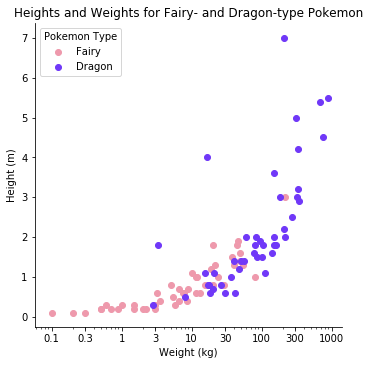

In [82]:
# After
type_colors = {'fairy': '#ee99ac', 'dragon': '#7038f8'}
g = sns.FacetGrid(data = pokemon_sub, hue = 'type', height = 5,
                 palette = type_colors)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)

# add labels and titles
g.set_xlabels('Weight (kg)')
g.set_ylabels('Height (m)')
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon')
plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type');